# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$\nabla_{w} Q(w) = -\frac{2}{l}X^T(y - Xw)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [5]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [6]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [7]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/95572882/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/95573523/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/95573680/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/95578500/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/95799095/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [9]:
data = pd.read_csv('autos.csv')

In [10]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

<function matplotlib.pyplot.show(close=None, block=None)>

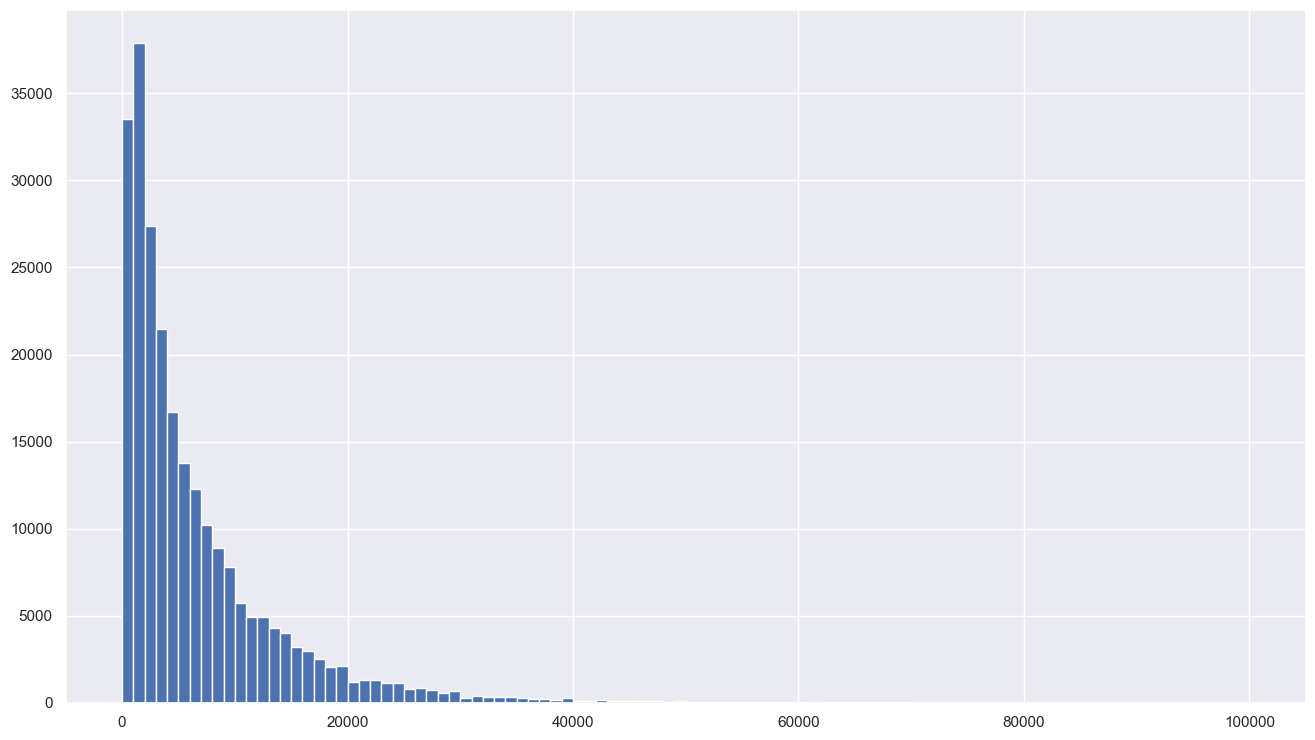

In [11]:
# нарисуем просто распределение цен
sns.set(rc={'figure.figsize':(16,9)})
plt.hist(data.price, bins=100)
plt.show

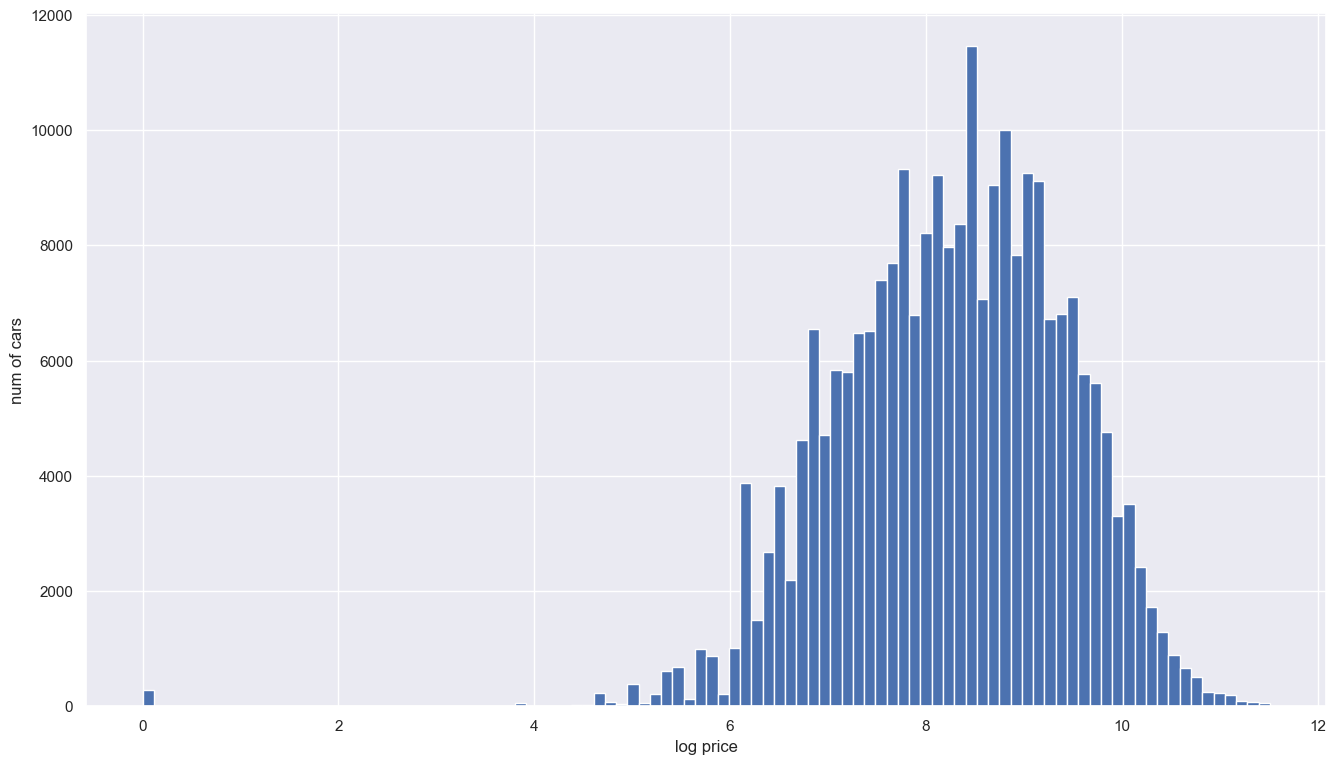

In [12]:
# нарисуем распределение логарифма цен
plt.hist(np.log(data.price), bins=100)
plt.xlabel("log price") 
plt.ylabel("num of cars")
plt.show()

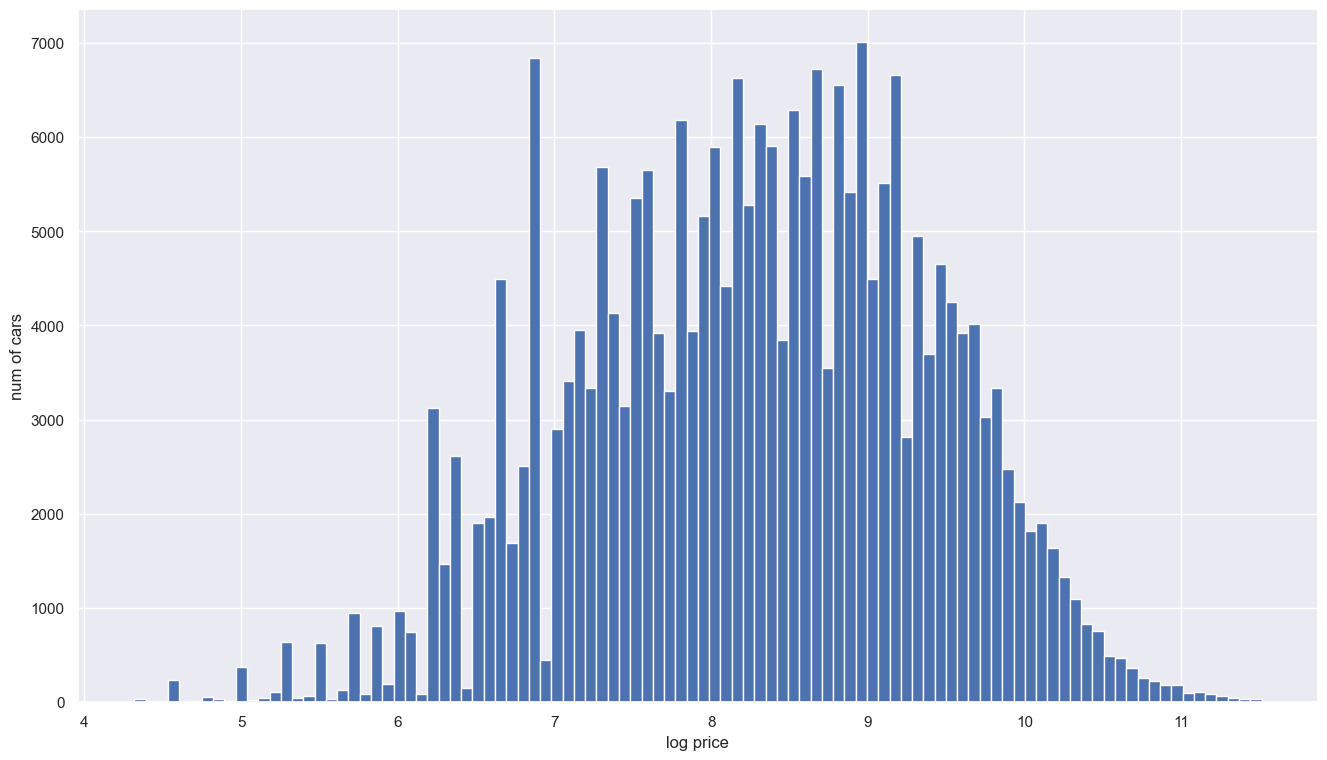

In [13]:
# заметим, что логарифм цен распределён значительно более адекватно. Будем использовать его.
# также тут точно есть машины с неадекватными ценами. Удалим слишком дешевые экземпляры

data.drop(data[np.log(data.price) < 4.3].index, inplace=True)

data["log_price"] = np.log(data.price)
plt.hist(data.log_price, bins=100)
plt.xlabel("log price") 
plt.ylabel("num of cars")
plt.show()

In [14]:
# посмотрим на типы данных в колонках
data.dtypes
# вроде тут все адекватно, ничего кастить не надо

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
log_price            float64
dtype: object

In [15]:
# проверим, что тут нету NaN
data.isnull().values.any()

False

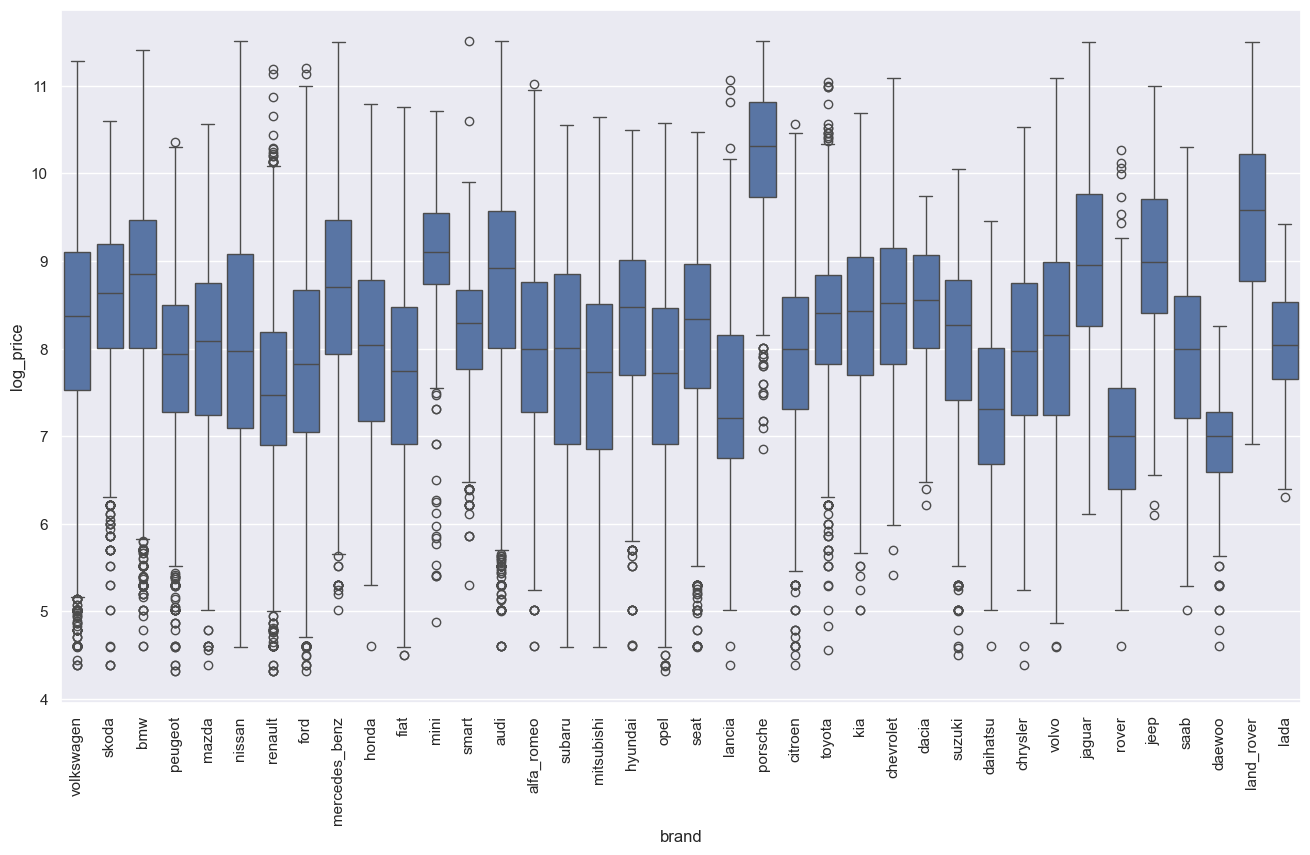

In [16]:

# построим распределение цен на бренды
g = sns.boxplot(data=data, x="brand", y="log_price")
plt.xticks(rotation=90)
plt.show()

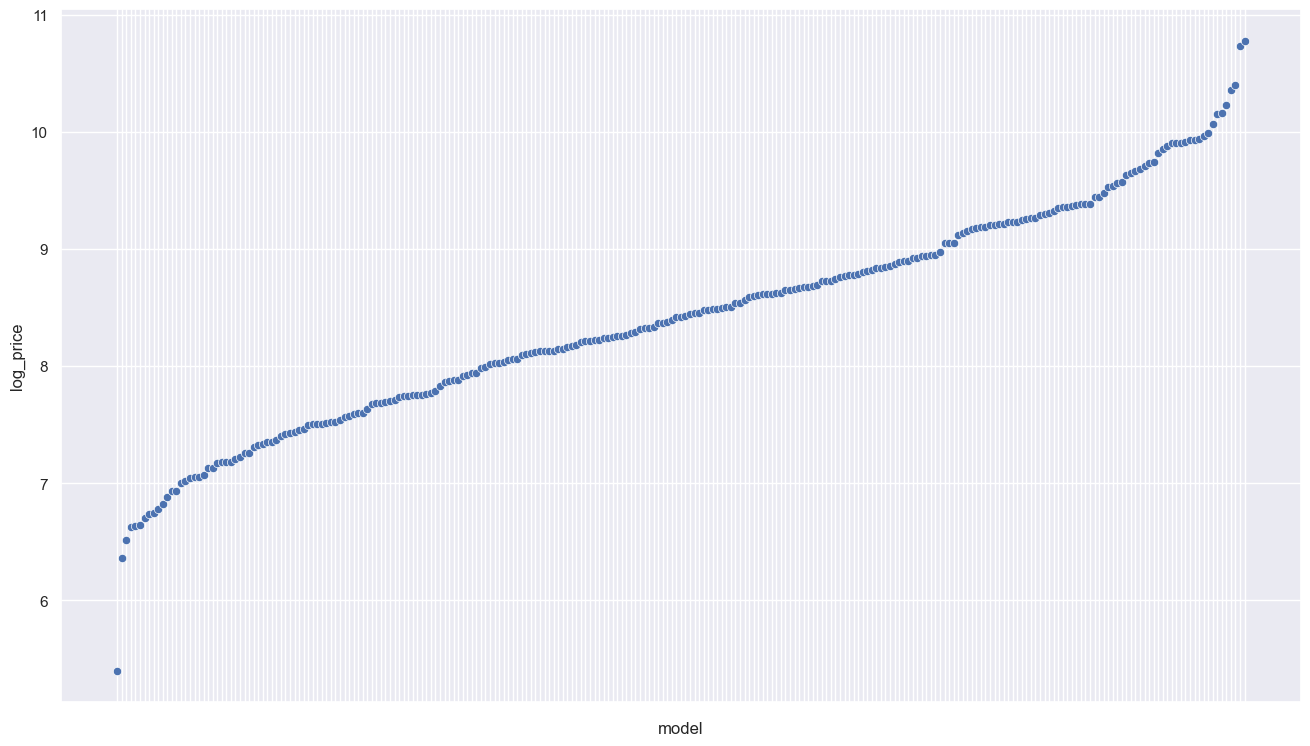

In [17]:
# видим, что цена заметно варьируется от бренда к бренду. Возьмём бренды в кат. признаки

# построим распределение цен на модели 

mean_log_price_for_model = data.groupby("model", as_index=False)[["model", "log_price"]].mean(numeric_only=True).sort_values(by="log_price")

g = sns.scatterplot(data=mean_log_price_for_model, x="model", y="log_price")
g.set(xticklabels=[])
plt.show()

In [18]:
# как видим, средняя цена на машину довольно сильно зависит от модели, но использовать OHE для них тяжело (моделей машин около 250)
# разобью модели по цене на группы по 20 моделей

group_num = 0
cars_in_group = 0
data["model_grouped"] = -1

type(mean_log_price_for_model.reset_index())
for index, row in mean_log_price_for_model.reset_index().iterrows():
    data.loc[data["model"] == row["model"], "model_grouped"] = group_num
    cars_in_group += 1
    if cars_in_group == 20:
        group_num += 1
        cars_in_group = 0
data

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price,model_grouped
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500,7.313220,4
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600,8.188689,5
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650,6.476972,5
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200,7.696213,3
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000,7.600902,3
...,...,...,...,...,...,...,...,...,...,...,...,...
241185,volkswagen,golf,limousine,manuell,diesel,nein,140,150000,69,7900,8.974618,4
241186,seat,leon,limousine,manuell,benzin,ja,225,150000,142,3200,8.070906,7
241187,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,192,1199,7.089243,5
241188,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,241,9200,9.126959,8


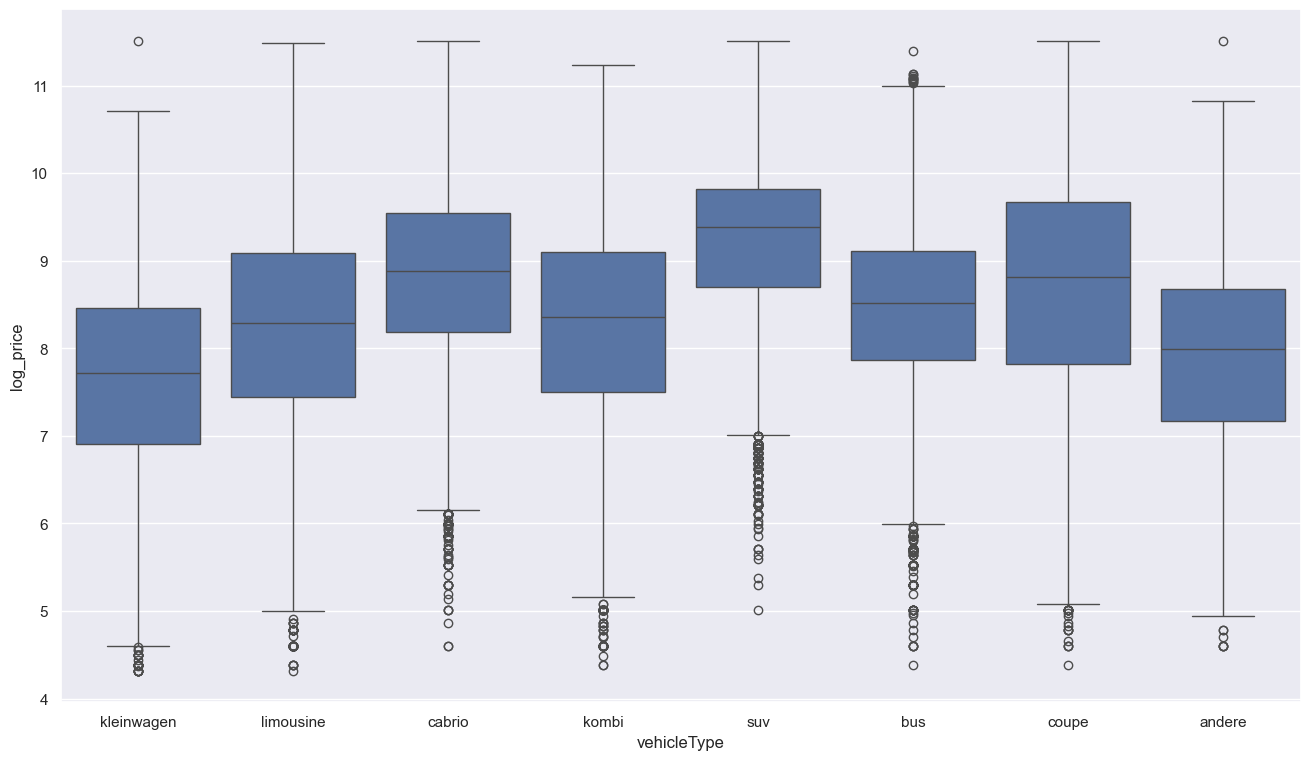

In [19]:

# построим распределение цен на типы кузовов

sns.boxplot(data=data, x="vehicleType", y="log_price")
plt.show()

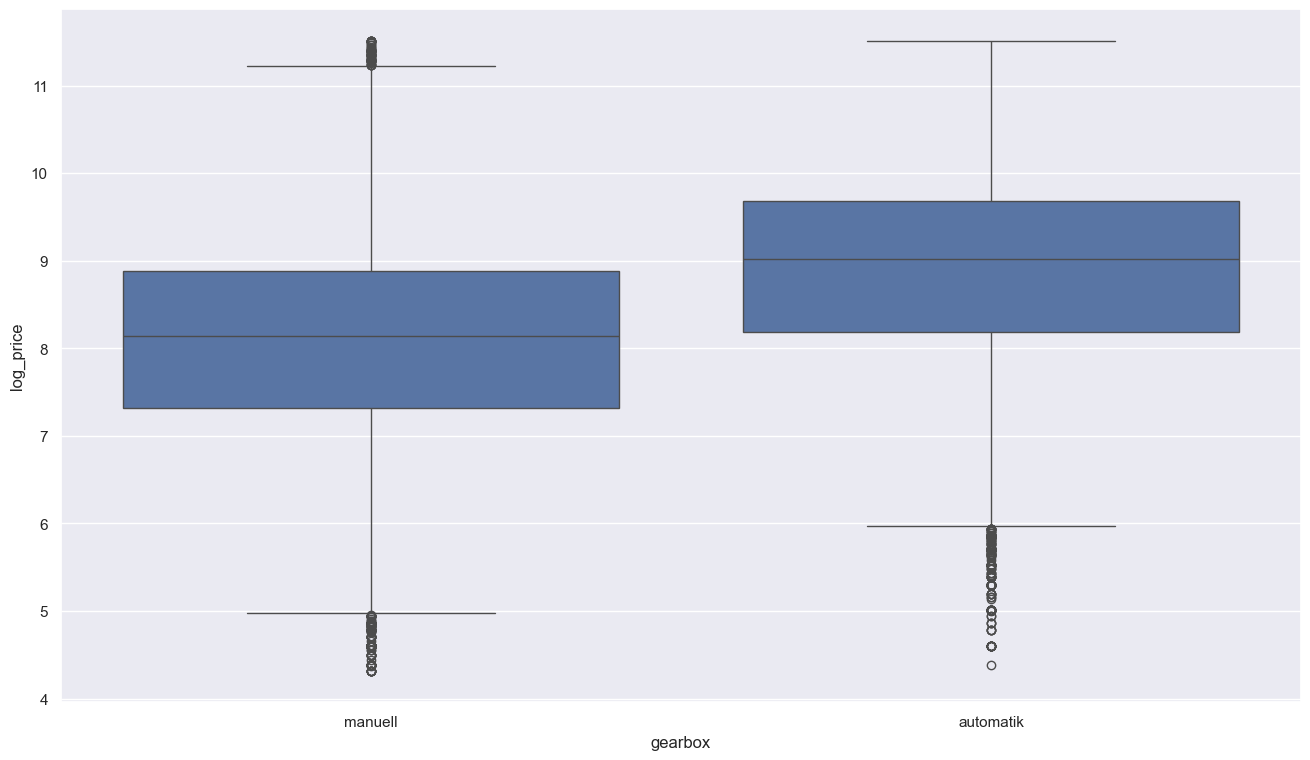

In [20]:
# видно, что цена тоже довольно сильно отличается для разных типов кузовов, добавим и кузов в кат. признаки

# построим распределение цен на типы коробок передач

sns.boxplot(data=data, x="gearbox", y="log_price")

plt.show()

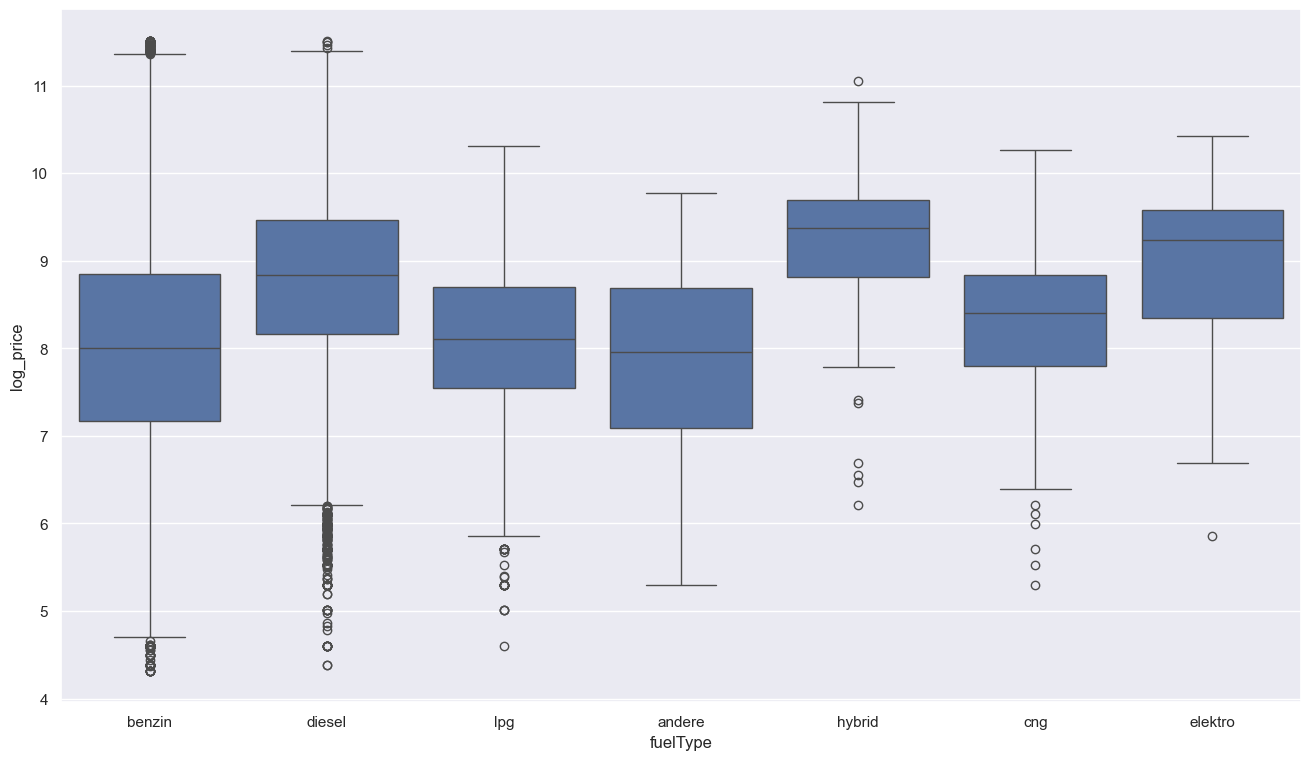

In [21]:
# разница заметна, добавим в кат. признаки

# построим распределение цен на тип топлива

sns.boxplot(data=data, x="fuelType", y="log_price")

plt.show()

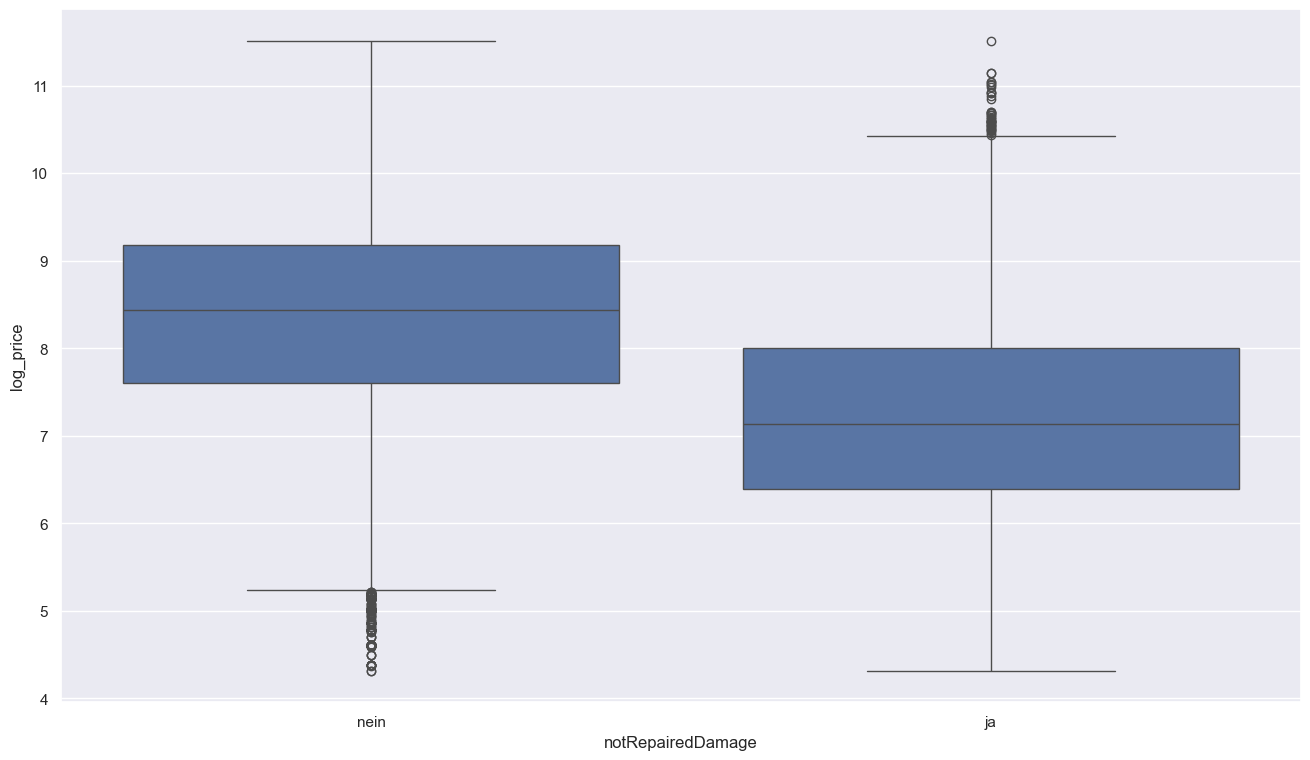

In [22]:
# разница также заметна, добавляем в кат. признаки

# построим распределение цен на то, есть ли неустраненные поломки

sns.boxplot(data=data, x="notRepairedDamage", y="log_price")

plt.show()

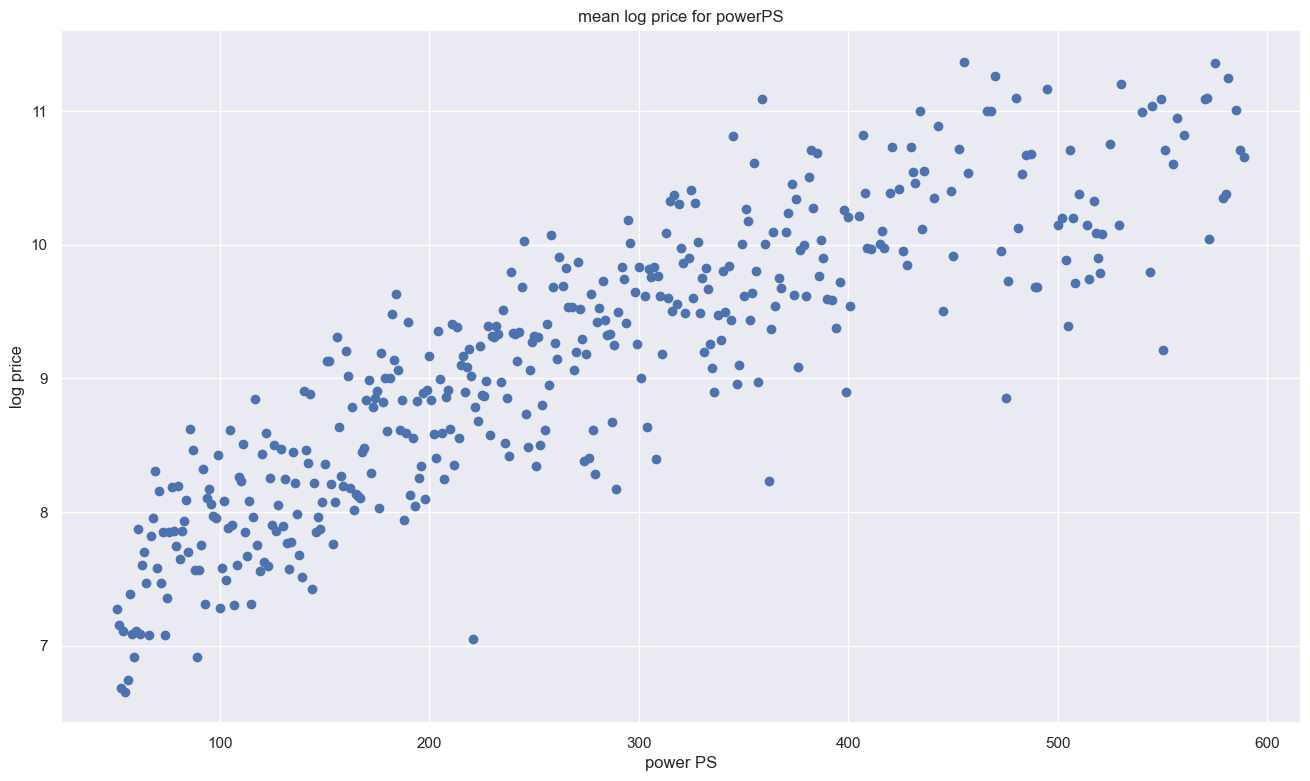

In [23]:
# разница сильная, добавляем в кат. признаки

# посмотрим на распределение средних цен на машину, в зависимости от мощности её двигателя

mean_log_price_for_power = data.groupby("powerPS", as_index=False)[["powerPS", "log_price"]].mean()
plt.scatter(mean_log_price_for_power.powerPS, mean_log_price_for_power.log_price)
plt.title("mean log price for powerPS")
plt.xlabel("power PS")
plt.ylabel("log price")
plt.show()

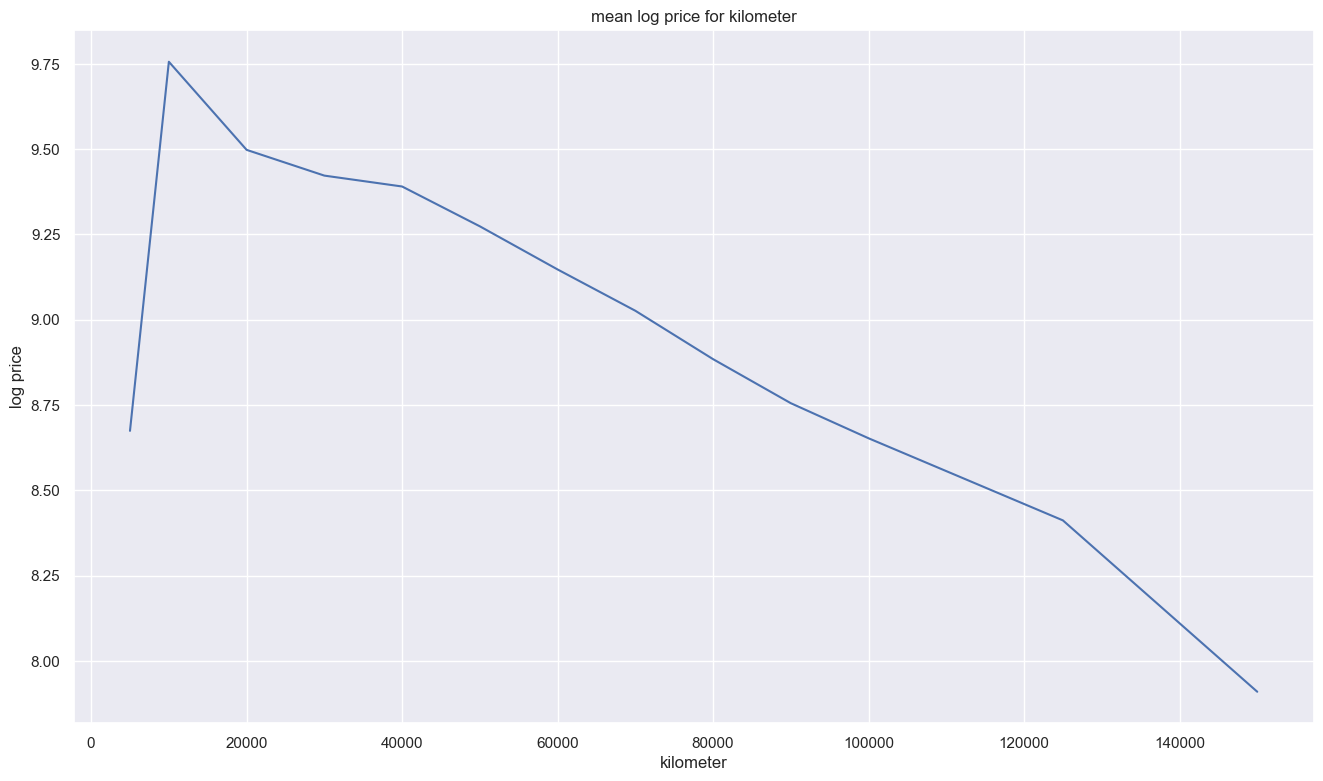

In [24]:
# зависимость видна, даже почти линейная, добавляем в численные признаки

# посмотрим на распределение средних цен на машину, в зависимости от её пробега

mean_log_price_for_kilometer = data.groupby("kilometer", as_index=False)[["kilometer", "log_price"]].mean()
plt.plot(mean_log_price_for_kilometer.kilometer, mean_log_price_for_kilometer.log_price)
plt.title("mean log price for kilometer")
plt.xlabel("kilometer")
plt.ylabel("log price")
plt.show()

In [25]:
# видно, что при пробеге около 5000км происходит какая-то аномалия, обработаем её

data["anomalyKilometer"] = np.where(data["kilometer"] < 10000, 1, 0)
data

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price,model_grouped,anomalyKilometer
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500,7.313220,4,0
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600,8.188689,5,0
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650,6.476972,5,0
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200,7.696213,3,0
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000,7.600902,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241185,volkswagen,golf,limousine,manuell,diesel,nein,140,150000,69,7900,8.974618,4,0
241186,seat,leon,limousine,manuell,benzin,ja,225,150000,142,3200,8.070906,7,0
241187,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,192,1199,7.089243,5,0
241188,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,241,9200,9.126959,8,0


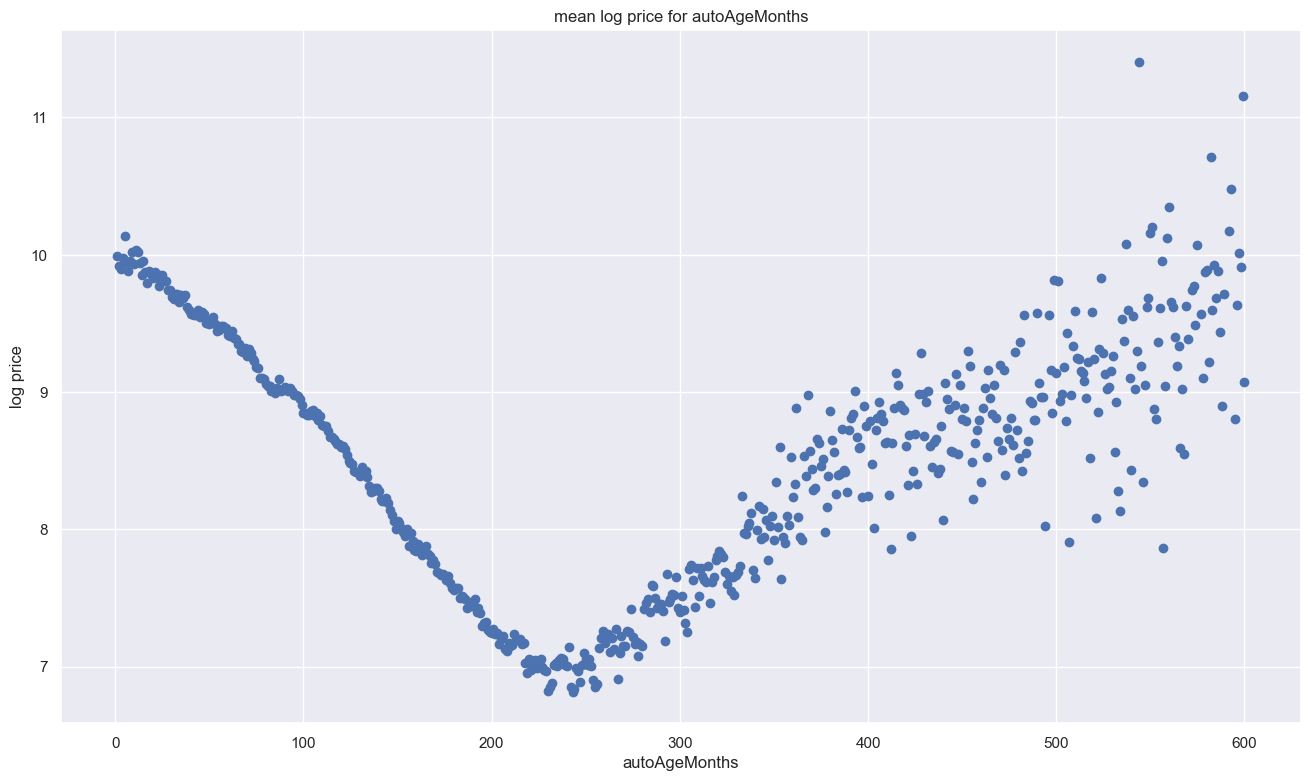

In [26]:
# посмотрим на распределение средних цен на машину, в зависимости от её возраста

mean_log_price_for_age = data.groupby("autoAgeMonths", as_index=False)[["autoAgeMonths", "log_price"]].mean()
plt.scatter(mean_log_price_for_age.autoAgeMonths, mean_log_price_for_age.log_price)
plt.title("mean log price for autoAgeMonths")
plt.xlabel("autoAgeMonths")
plt.ylabel("log price")
plt.show()

In [27]:
# видим, что тут все весело. разобъем 1 зависимость на 2 (будем считать до 230 месяцев машину стареющей, а после - хорошеющей)

data["badAutoAgeMonths"] = np.where(data.autoAgeMonths < 230, data.autoAgeMonths, 230)
data["goodAutoAgeMonths"] = np.where(data.autoAgeMonths < 230, 0, data.autoAgeMonths - 230)
data

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price,model_grouped,anomalyKilometer,badAutoAgeMonths,goodAutoAgeMonths
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500,7.313220,4,0,177,0
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600,8.188689,5,0,93,0
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650,6.476972,5,0,230,16
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200,7.696213,3,0,140,0
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000,7.600902,3,0,136,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241185,volkswagen,golf,limousine,manuell,diesel,nein,140,150000,69,7900,8.974618,4,0,69,0
241186,seat,leon,limousine,manuell,benzin,ja,225,150000,142,3200,8.070906,7,0,142,0
241187,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,192,1199,7.089243,5,0,192,0
241188,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,241,9200,9.126959,8,0,230,11


In [28]:
categorical = ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'anomalyKilometer', "model_grouped"]
numeric = ["powerPS", "kilometer", "badAutoAgeMonths", "goodAutoAgeMonths"]
other = []


In [29]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other + ["model"]]
y = data['log_price']

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
], sparse_threshold=0)

x = column_transformer.fit_transform(x)
x

array([[ 0.        ,  0.        ,  0.        , ...,  0.61601166,
        -0.20804058,  1.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.75937804,
        -0.20804058,  1.        ],
       [ 0.        ,  0.        ,  1.        , ...,  1.48381706,
         0.42019459,  1.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.86161696,
        -0.20804058,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  1.48381706,
         0.2238711 ,  1.        ],
       [ 0.        ,  0.        ,  1.        , ..., -1.77454663,
        -0.20804058,  1.        ]])

In [31]:
from sklearn.model_selection import train_test_split


X_train, X_test_val, y_train, y_test_val = train_test_split(x, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [175]:
from descents import VanillaGradientDescent
from sklearn.metrics import r2_score

lambdas = np.logspace(-5, 2, 8)
lambdas

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [187]:
def find_best_lambdas_descend(d_config, X_train, y_train, X_val, y_val, lambdas):
    best_l = None
    best_loss = np.Inf
    best_iter_num = None

    for l in lambdas:
        d_config["kwargs"]["lambda_"] = l
        model = LinearRegression(descent_config=d_config)
        model.fit(X_train, y_train)
        loss = model.calc_loss(X_val, y_val)
        if loss < best_loss:
            best_iter_num = len(model.loss_history)
            best_loss = loss
            best_l = l
        
    return best_l, best_loss, best_iter_num


def test_descend(d_config, X_train, y_train, X_test, y_test):
    model = LinearRegression(descent_config=d_config)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_loss = model.calc_loss(X_test, y_test)
    R2 = r2_score(y_test, y_pred)
    
    return test_loss, R2, model.loss_history

In [188]:
# Vanilla

dimension = X_train.shape[1]
descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': dimension,
    }
}

best_vanilla_l, best_vanilla_loss, best_vanilla_iter_num = find_best_lambdas_descend(descent_config, X_train, y_train.to_numpy(), X_val, y_val.to_numpy(), lambdas)
        
print(f"l: {best_vanilla_l}")
print(f"loss: {best_vanilla_loss}")
print(f"iter_num: {best_vanilla_iter_num}")


c:\Python310\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\ml_notebooks\ml_hw_3\descents.py:78: RuntimeWarning: overflow encountered in square
  return np.mean(np.square(y - self.predict(x)))
c:\ml_notebooks\ml_hw_3\linear_regression.py:41: RuntimeWarning: overflow encountered in square
  if np.sum(np.square(weights_diff)) < self.tolerance:


l: 1.0
loss: 0.22416450315695435
iter_num: 48


c:\ml_notebooks\ml_hw_3\descents.py:104: RuntimeWarning: overflow encountered in multiply
  self.w -= self.lr() * gradient
c:\ml_notebooks\ml_hw_3\descents.py:91: RuntimeWarning: invalid value encountered in matmul
  return x @ self.w
c:\ml_notebooks\ml_hw_3\descents.py:109: RuntimeWarning: invalid value encountered in matmul
  return - (2 / x.shape[0]) * x.T @ (y - x @ self.w)


In [189]:
# Vanilla test
dimension = X_train.shape[1]
descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': dimension,
        'lambda_': best_vanilla_l
    }
}

vanilla_test_loss, vanilla_R2, vanilla_loss_history = test_descend(descent_config, X_train, y_train.to_numpy(), X_test, y_test.to_numpy())
print(f"test_loss: {vanilla_test_loss}")
print(f"R2: {vanilla_R2}")


test_loss: 0.22296526087371438
R2: 0.8205021547948773


In [190]:
# Stochastic

dimension = X_train.shape[1]
descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
    }
}

best_stochastic_l, best_stochastic_loss, best_stochastic_iter_num = find_best_lambdas_descend(descent_config, X_train, y_train.to_numpy(), X_val, y_val.to_numpy(), lambdas)

print(f"l: {best_stochastic_l}")
print(f"loss: {best_stochastic_loss}")
print(f"iter_num: {best_stochastic_iter_num}")

c:\Python310\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\ml_notebooks\ml_hw_3\descents.py:78: RuntimeWarning: overflow encountered in square
  return np.mean(np.square(y - self.predict(x)))
c:\ml_notebooks\ml_hw_3\linear_regression.py:41: RuntimeWarning: overflow encountered in square
  if np.sum(np.square(weights_diff)) < self.tolerance:


l: 0.1
loss: 0.4242798117566942
iter_num: 41


c:\ml_notebooks\ml_hw_3\descents.py:104: RuntimeWarning: overflow encountered in multiply
  self.w -= self.lr() * gradient
c:\ml_notebooks\ml_hw_3\descents.py:91: RuntimeWarning: overflow encountered in matmul
  return x @ self.w
c:\ml_notebooks\ml_hw_3\descents.py:91: RuntimeWarning: invalid value encountered in matmul
  return x @ self.w
c:\ml_notebooks\ml_hw_3\descents.py:109: RuntimeWarning: overflow encountered in matmul
  return - (2 / x.shape[0]) * x.T @ (y - x @ self.w)
c:\ml_notebooks\ml_hw_3\descents.py:109: RuntimeWarning: invalid value encountered in matmul
  return - (2 / x.shape[0]) * x.T @ (y - x @ self.w)


In [191]:
# Stochastic test
dimension = X_train.shape[1]
descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'lambda_': best_stochastic_l
    }
}

stochastic_test_loss, stochastic_R2, stochastic_loss_history = test_descend(descent_config, X_train, y_train.to_numpy(), X_test, y_test.to_numpy())
print(f"test_loss: {stochastic_test_loss}")
print(f"R2: {stochastic_R2}")


test_loss: 0.4175141774165715
R2: 0.6638808445082802


In [192]:
# Momentum

dimension = X_train.shape[1]
descent_config = {
    'descent_name': 'momentum',
    'kwargs': {
        'dimension': dimension,
    }
}

best_momentum_l, best_momentum_loss, best_momentum_iter_num = find_best_lambdas_descend(descent_config, X_train, y_train.to_numpy(), X_val, y_val.to_numpy(), lambdas)

print(f"l: {best_momentum_l}")
print(f"loss: {best_momentum_loss}")
print(f"iter_num: {best_momentum_iter_num}")

c:\ml_notebooks\ml_hw_3\descents.py:78: RuntimeWarning: overflow encountered in square
  return np.mean(np.square(y - self.predict(x)))
c:\ml_notebooks\ml_hw_3\linear_regression.py:41: RuntimeWarning: overflow encountered in square
  if np.sum(np.square(weights_diff)) < self.tolerance:


l: 1.0
loss: 0.234646389239399
iter_num: 144


c:\ml_notebooks\ml_hw_3\descents.py:148: RuntimeWarning: overflow encountered in multiply
  self.h = self.h * self.alpha + self.lr() * gradient
c:\ml_notebooks\ml_hw_3\descents.py:91: RuntimeWarning: overflow encountered in matmul
  return x @ self.w
c:\ml_notebooks\ml_hw_3\descents.py:91: RuntimeWarning: invalid value encountered in matmul
  return x @ self.w
c:\ml_notebooks\ml_hw_3\descents.py:109: RuntimeWarning: overflow encountered in matmul
  return - (2 / x.shape[0]) * x.T @ (y - x @ self.w)
c:\ml_notebooks\ml_hw_3\descents.py:109: RuntimeWarning: invalid value encountered in matmul
  return - (2 / x.shape[0]) * x.T @ (y - x @ self.w)


In [193]:
# Momentum test
dimension = X_train.shape[1]
descent_config = {
    "descent_name": "momentum",
    "kwargs": {"dimension": dimension, "lambda_": best_momentum_l},
}

momentum_test_loss, momentum_R2, momentum_loss_history = test_descend(
    descent_config, X_train, y_train.to_numpy(), X_test, y_test.to_numpy()
)
print(f"test_loss: {momentum_test_loss}")
print(f"R2: {momentum_R2}")

test_loss: 0.3666876306433847
R2: 0.7047986789245202


In [194]:
# Adam

dimension = X_train.shape[1]
descent_config = {
    "descent_name": "adam",
    "kwargs": {
        "dimension": dimension,
    },
}

best_adam_l, best_adam_loss, best_adam_iter_num = find_best_lambdas_descend(
    descent_config, X_train, y_train.to_numpy(), X_val, y_val.to_numpy(), lambdas
)

print(f"l: {best_adam_l}")
print(f"loss: {best_adam_loss}")
print(f"iter_num: {best_adam_iter_num}")

l: 1.0
loss: 0.1989468401854308
iter_num: 79


In [195]:
# Adam test
dimension = X_train.shape[1]
descent_config = {
    "descent_name": "adam",
    "kwargs": {"dimension": dimension, "lambda_": best_adam_l},
}

adam_test_loss, adam_R2, adam_loss_history = test_descend(
    descent_config, X_train, y_train.to_numpy(), X_test, y_test.to_numpy()
)
print(f"test_loss: {adam_test_loss}")
print(f"R2: {adam_R2}")

test_loss: 0.19726785387674722
R2: 0.8411898133352237


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


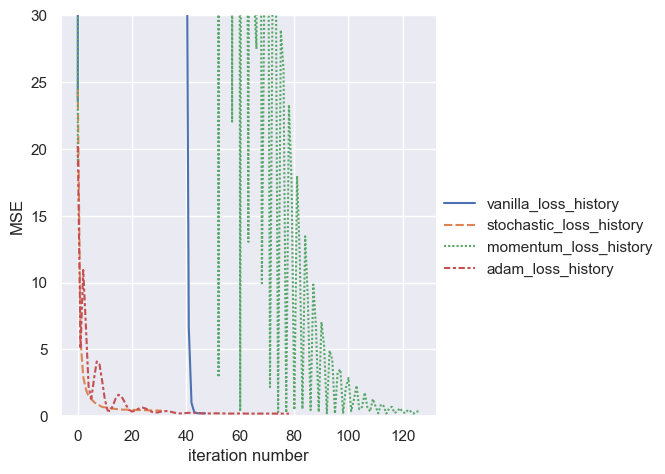

In [196]:
g = sns.relplot(
    {
        "vanilla_loss_history": vanilla_loss_history,
        "stochastic_loss_history": stochastic_loss_history,
        "momentum_loss_history": momentum_loss_history,
        "adam_loss_history": adam_loss_history,
    },
    kind="line",
)
g.set(ylim=(0, 30), xlabel="iteration number", ylabel="MSE")
plt.show()

В итоге получили, что самую высокую метрику $R^2$ показал метод Adam (0.84). По графикам можно заметить, что loss у Adam падает достаточно быстро, быстрее он упал только у стохастического спуска. Также можно заметить, что с графиком классического градиентного спуска произошло что-то странное: сначала лосс улетел вверх, а потом очень быстро метод сошелся (быстрее всех в итоге). Классический градиентный спуск с инерцией (momentum) показал себя довольно плохо - сходился долго и не лучшая R2

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [197]:
import time
batch_sizes = np.arange(5, 500, 10)

def test_batch_size_descend(X, y, batch_size, k=10):
    d_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': X.shape[1],
            'lambda_': best_stochastic_l,
            'batch_size': batch_size
        }
    }
    time_deltas = []
    iter_nums = []
    for _ in range(k):
        model = LinearRegression(descent_config=d_config)
        start_time = time.time()
        model.fit(X, y.to_numpy())
        time_deltas += [time.time() - start_time]
        iter_nums += [len(model.loss_history)]
    
    avg_time_delta = np.mean(time_deltas)
    avg_iter_num = np.mean(iter_nums)
    return avg_time_delta, avg_iter_num

In [198]:
results = {}
for bs in batch_sizes:
    results[bs] = test_batch_size_descend(X_train, y_train, bs)
results

{5: (0.43092238903045654, 54.2),
 15: (0.3357964754104614, 41.3),
 25: (0.3710453748703003, 47.2),
 35: (0.30885450839996337, 39.5),
 45: (0.2989358901977539, 37.3),
 55: (0.257112717628479, 33.0),
 65: (0.2460655689239502, 31.8),
 75: (0.2285454273223877, 29.7),
 85: (0.2282550096511841, 28.8),
 95: (0.26368615627288816, 33.8),
 105: (0.24371249675750734, 32.3),
 115: (0.24069435596466066, 31.4),
 125: (0.22178497314453124, 28.6),
 135: (0.21217455863952636, 28.2),
 145: (0.2411886930465698, 31.3),
 155: (0.2114931106567383, 27.8),
 165: (0.23212149143218994, 29.8),
 175: (0.2170003890991211, 28.4),
 185: (0.22635269165039062, 29.6),
 195: (0.23191025257110595, 28.0),
 205: (0.23098380565643312, 29.7),
 215: (0.21879444122314454, 27.6),
 225: (0.22303955554962157, 28.3),
 235: (0.25366246700286865, 30.1),
 245: (0.2121833086013794, 26.8),
 255: (0.22149500846862794, 28.3),
 265: (0.22568323612213134, 28.7),
 275: (0.21664974689483643, 27.2),
 285: (0.2245483636856079, 29.4),
 295: (0.

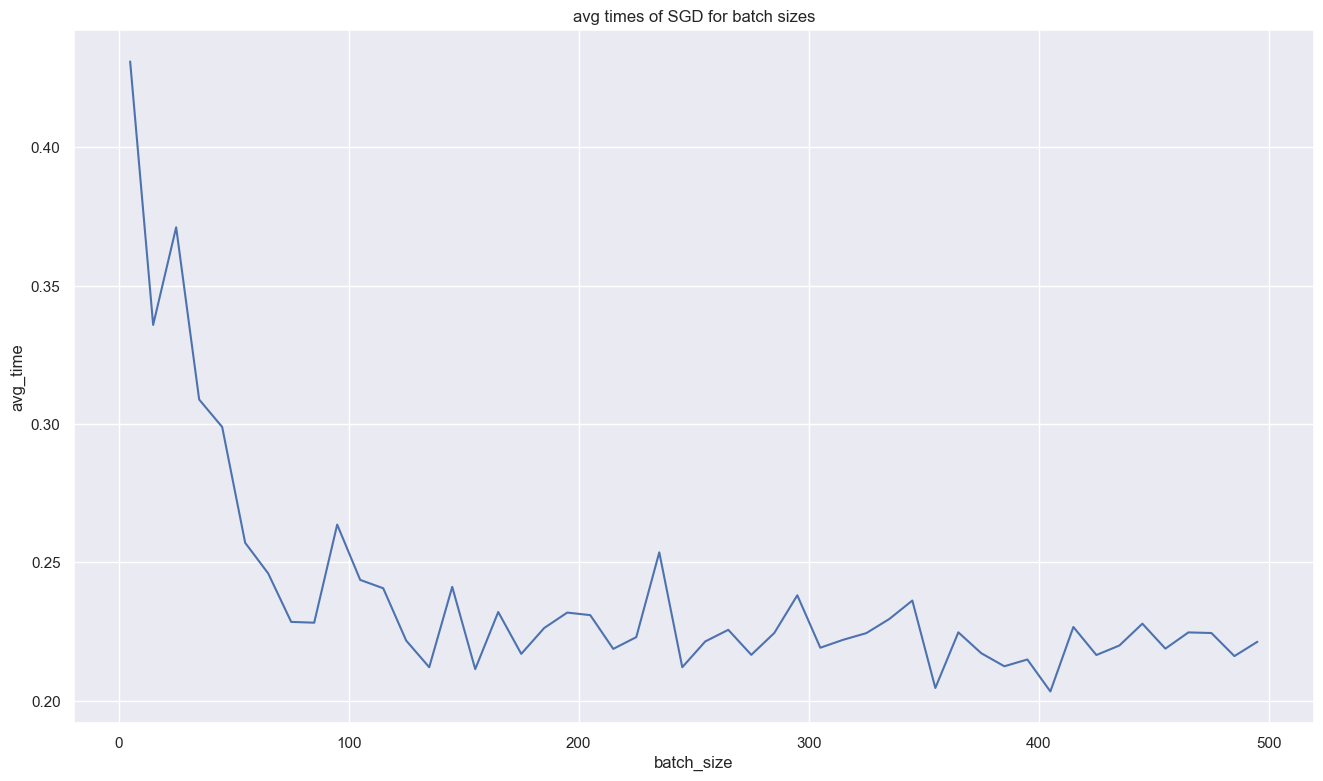

In [199]:
res_df = pd.DataFrame.from_dict(results, orient='index')
res_df.reset_index(inplace=True)
res_df.rename(columns={0: "avg_time", 1: "avg_iter_num", "index": "batch_size"}, inplace=True)

sns.lineplot(data=res_df, x="batch_size", y="avg_time")
plt.title("avg times of SGD for batch sizes")
plt.show()

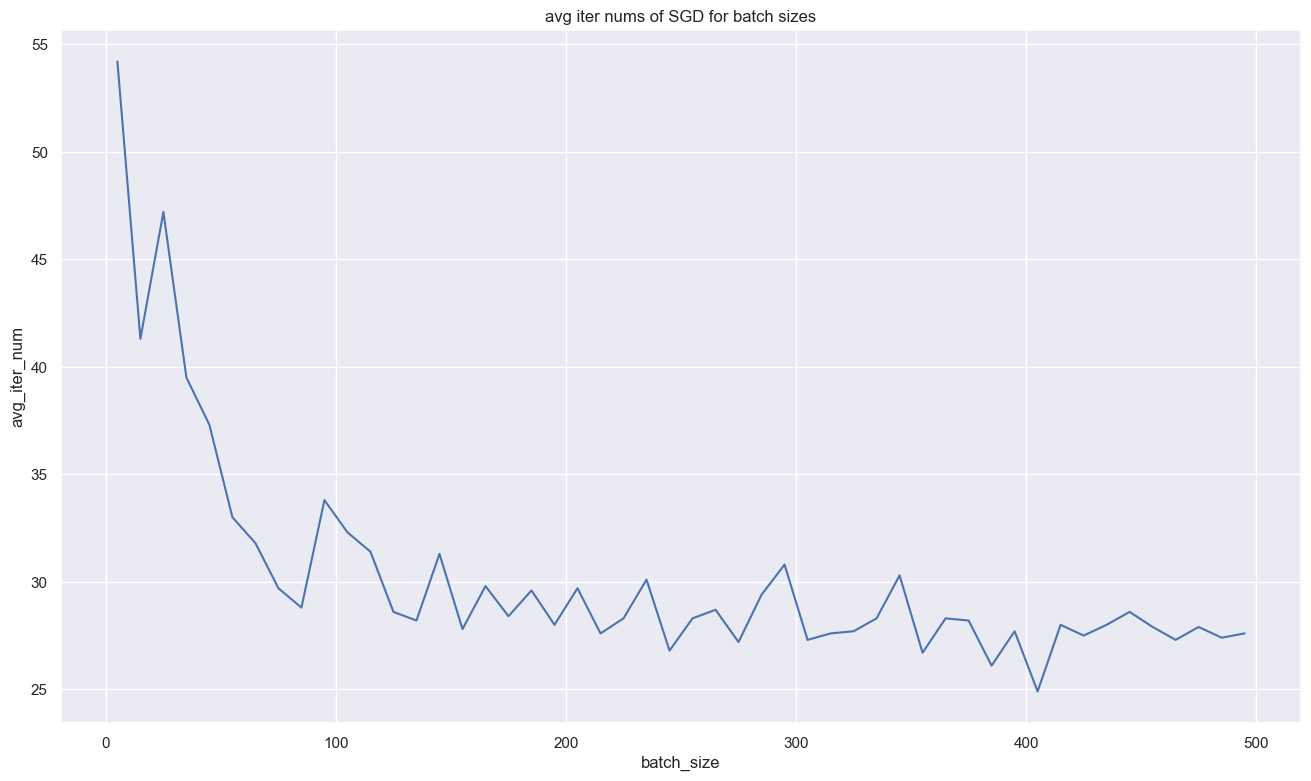

In [200]:
sns.lineplot(data=res_df, x="batch_size", y="avg_iter_num")
plt.title("avg iter nums of SGD for batch sizes")
plt.show()

Видно, что с увеличением размера батча падает необходимое количество итераций до сходимости и, соответственно, уменьшается необходимое время для сходимости. В нашей задаче имеет смысл брать размер батча около 150-200, т.к. при дальнейшем увеличении размера батча кол-во итераций и время выполнения уменьшаются не так сильно.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/96024861/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [201]:
lambdas = np.logspace(-5, 2, 8)
mus = np.append(np.logspace(-5, -1, 5), np.append([0], np.logspace(0, 2, 3)))
(mus, lambdas)

(array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 0.e+00, 1.e+00, 1.e+01,
        1.e+02]),
 array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]))

In [202]:
def find_best_lambda_and_mu_descend(d_config, lambdas, mus, X, y, X_val, y_val):
    best_l = None
    best_mu = None
    best_loss = np.Inf
    best_iter_num = None

    for l in lambdas:
        for mu in mus:
            d_config["kwargs"]["lambda_"] = l
            d_config["kwargs"]["mu"] = mu
            model = LinearRegression(descent_config=d_config)
            model.fit(X, y)
            loss = model.calc_loss(X_val, y_val)
            if loss < best_loss:
                best_iter_num = len(model.loss_history)
                best_loss =loss
                best_l = l
                best_mu = mu
        
    return (best_l, best_mu), best_loss, best_iter_num

# для теста будем использовать ту же функцию (test_descend)

In [203]:
# Vanilla

descent_config = {
    'descent_name': 'full',
    "regularized": True,
    'kwargs': {
        'dimension': dimension,
    }
}

best_vanilla_l_and_mu, best_vanilla_loss, best_vanilla_iter_num = find_best_lambda_and_mu_descend(descent_config, lambdas, mus, X_train, y_train.to_numpy(), X_val, y_val.to_numpy())
        
print(f"l, mu: {best_vanilla_l_and_mu}")
print(f"loss: {best_vanilla_loss}")
print(f"iter_num: {best_vanilla_iter_num}")

c:\Python310\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\ml_notebooks\ml_hw_3\descents.py:78: RuntimeWarning: overflow encountered in square
  return np.mean(np.square(y - self.predict(x)))
c:\ml_notebooks\ml_hw_3\linear_regression.py:41: RuntimeWarning: overflow encountered in square
  if np.sum(np.square(weights_diff)) < self.tolerance:
c:\ml_notebooks\ml_hw_3\descents.py:224: RuntimeWarning: overflow encountered in multiply
  return super().calc_gradient(x, y) + l2_gradient * self.mu
c:\ml_notebooks\ml_hw_3\descents.py:224: RuntimeWarning: overflow encountered in add
  return super().calc_gradient(x, y) + l2_gradient * self.mu
c:\ml_notebooks\ml_hw_3\descents.py:91: RuntimeWarning: invalid value encountered in matmul
  return x @ self.w
c:\ml_notebooks\ml_hw_3\descents.py:109: RuntimeWarning: invalid value encountered in matmul
  return - (2 / x.shape[0]) * x.T @ (y - x @

l, mu: (1.0, 0.01)
loss: 0.23956054167442642
iter_num: 53


In [204]:
# Vanilla test

descent_config = {
    'descent_name': 'full',
    'regularized': True,
    'kwargs': {
        'dimension': dimension,
        'lambda_': best_vanilla_l_and_mu[0],
        'mu': best_vanilla_l_and_mu[1]
    }
}

vanilla_test_loss, vanilla_R2, vanilla_reg_loss_history = test_descend(descent_config, X_train, y_train.to_numpy(), X_test, y_test.to_numpy())
print(f"test_loss: {vanilla_test_loss}")
print(f"R2: {vanilla_R2}")

test_loss: 0.24232424809500125
R2: 0.8049172314845925


In [205]:
# Stochastic

dimension = X_train.shape[1]
descent_config = {
    'descent_name': 'stochastic',
    'regularized': True,
    'kwargs': {
        'dimension': dimension,
    }
}

best_stochastic_l_and_mu, best_stochastic_loss, best_stochastic_iter_num = find_best_lambda_and_mu_descend(descent_config, lambdas, mus, X_train, y_train.to_numpy(), X_val, y_val.to_numpy())

print(f"l, mu: {best_stochastic_l_and_mu}")
print(f"loss: {best_stochastic_loss}")
print(f"iter_num: {best_stochastic_iter_num}")

c:\Python310\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\ml_notebooks\ml_hw_3\descents.py:78: RuntimeWarning: overflow encountered in square
  return np.mean(np.square(y - self.predict(x)))
c:\ml_notebooks\ml_hw_3\linear_regression.py:41: RuntimeWarning: overflow encountered in square
  if np.sum(np.square(weights_diff)) < self.tolerance:
c:\ml_notebooks\ml_hw_3\descents.py:91: RuntimeWarning: overflow encountered in matmul
  return x @ self.w
c:\ml_notebooks\ml_hw_3\descents.py:109: RuntimeWarning: overflow encountered in matmul
  return - (2 / x.shape[0]) * x.T @ (y - x @ self.w)
c:\ml_notebooks\ml_hw_3\descents.py:109: RuntimeWarning: invalid value encountered in matmul
  return - (2 / x.shape[0]) * x.T @ (y - x @ self.w)
c:\ml_notebooks\ml_hw_3\descents.py:224: RuntimeWarning: overflow encountered in multiply
  return super().calc_gradient(x, y) + l2_gradient * self.mu
c

l, mu: (0.1, 0.1)
loss: 0.40844048460250115
iter_num: 53


In [206]:
# Stochastic test

dimension = X_train.shape[1]
descent_config = {
    'descent_name': 'full',
    'regularized': True,
    'kwargs': {
        'dimension': dimension,
        'lambda_': best_stochastic_l_and_mu[0],
        'mu': best_stochastic_l_and_mu[1]
    }
}

stochastic_test_loss, stochastic_R2, stochastic_reg_loss_history = test_descend(descent_config, X_train, y_train.to_numpy(), X_test, y_test.to_numpy())
print(f"test_loss: {stochastic_test_loss}")
print(f"R2: {stochastic_R2}")

test_loss: 0.4656046149530868
R2: 0.6251657106845172


In [207]:
# Momentum

dimension = X_train.shape[1]
descent_config = {
    'descent_name': 'momentum',
    'regularized': True,
    'kwargs': {
        'dimension': dimension,
    }
}

best_momentum_l_and_mu, best_momentum_loss, best_momentum_iter_num = find_best_lambda_and_mu_descend(descent_config, lambdas, mus, X_train, y_train.to_numpy(), X_val, y_val.to_numpy())

print(f"l, mu: {best_momentum_l_and_mu}")
print(f"loss: {best_momentum_loss}")
print(f"iter_num: {best_momentum_iter_num}")

c:\ml_notebooks\ml_hw_3\linear_regression.py:41: RuntimeWarning: overflow encountered in square
  if np.sum(np.square(weights_diff)) < self.tolerance:
c:\ml_notebooks\ml_hw_3\descents.py:78: RuntimeWarning: overflow encountered in square
  return np.mean(np.square(y - self.predict(x)))
c:\Python310\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\ml_notebooks\ml_hw_3\descents.py:91: RuntimeWarning: overflow encountered in matmul
  return x @ self.w
c:\ml_notebooks\ml_hw_3\descents.py:109: RuntimeWarning: overflow encountered in matmul
  return - (2 / x.shape[0]) * x.T @ (y - x @ self.w)
c:\ml_notebooks\ml_hw_3\descents.py:109: RuntimeWarning: invalid value encountered in matmul
  return - (2 / x.shape[0]) * x.T @ (y - x @ self.w)
c:\ml_notebooks\ml_hw_3\descents.py:224: RuntimeWarning: overflow encountered in multiply
  return super().calc_gradient(x, y) + l2_gradient * self.mu
c

l, mu: (1.0, 0.01)
loss: 0.20720302071000965
iter_num: 301


In [208]:
# Momentum test

dimension = X_train.shape[1]
descent_config = {
    "descent_name": "momentum",
    "regularized": True,
    "kwargs": {
        "dimension": dimension,
        "lambda_": best_momentum_l_and_mu[0],
        "mu": best_momentum_l_and_mu[1],
    },
}

momentum_test_loss, momentum_R2, momentum_reg_loss_history = test_descend(
    descent_config, X_train, y_train.to_numpy(), X_test, y_test.to_numpy()
)
print(f"test_loss: {momentum_test_loss}")
print(f"R2: {momentum_R2}")

test_loss: 0.2067417718304379
R2: 0.8335628500510159


In [209]:
# Adam

dimension = X_train.shape[1]
descent_config = {
    "descent_name": "adam",
    "regularized": True,
    "kwargs": {
        "dimension": dimension,
    },
}

best_adam_l_and_mu, best_adam_loss, best_adam_iter_num = find_best_lambda_and_mu_descend(descent_config, lambdas, mus, X_train, y_train.to_numpy(), X_val, y_val.to_numpy())


print(f"l, mu: {best_adam_l_and_mu}")
print(f"loss: {best_adam_loss}")
print(f"iter_num: {best_adam_iter_num}")

l, mu: (1.0, 0.0001)
loss: 0.19939702980046548
iter_num: 80


In [210]:
# Adam test
dimension = X_train.shape[1]
descent_config = {
    "descent_name": "adam",
    "regularized": True,
    "kwargs": {"dimension": dimension, "lambda_": best_adam_l_and_mu[0], "mu": best_adam_l_and_mu[1],},
}

adam_test_loss, adam_R2, adam_reg_loss_history = test_descend(
    descent_config, X_train, y_train.to_numpy(), X_test, y_test.to_numpy()
)
print(f"test_loss: {adam_test_loss}")
print(f"R2: {adam_R2}")

test_loss: 0.19776561823482247
R2: 0.8407890888934685


c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


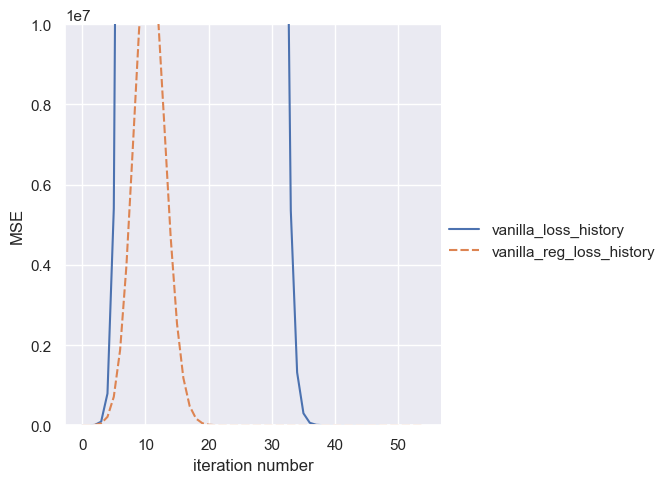

In [211]:
# строим графики

# Vanilla

g = sns.relplot(
    {
        "vanilla_loss_history": vanilla_loss_history,
        "vanilla_reg_loss_history": vanilla_reg_loss_history,
    },
    kind="line",
)

g.set(ylim=(0, 10000000), xlabel="iteration number", ylabel="MSE")

plt.show()



c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


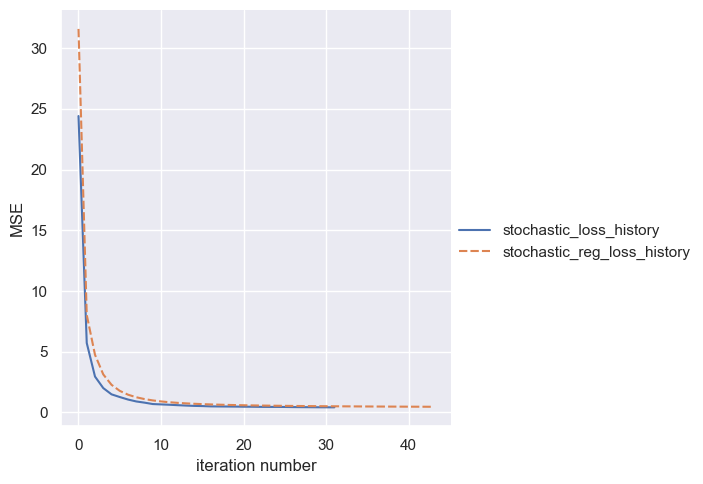

In [212]:
# Stochastic

g = sns.relplot(
    {
        "stochastic_loss_history": stochastic_loss_history,
        "stochastic_reg_loss_history": stochastic_reg_loss_history,
    },
    kind="line",
)

g.set(xlabel="iteration number", ylabel="MSE")

plt.show()


c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


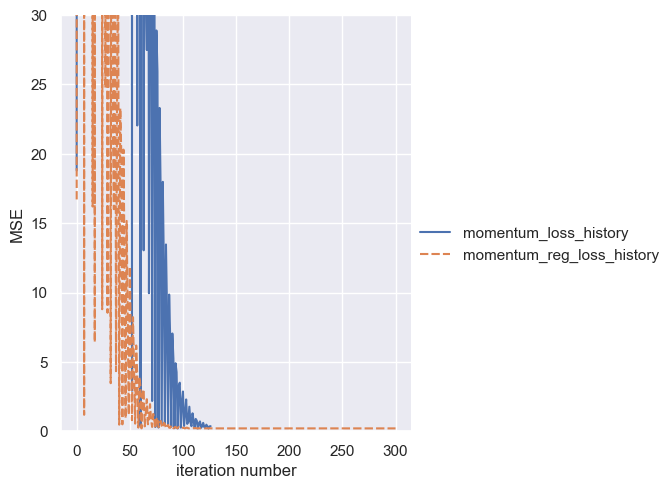

In [213]:
# Momentum

g = sns.relplot(
    {
        "momentum_loss_history": momentum_loss_history,
        "momentum_reg_loss_history": momentum_reg_loss_history,
    },
    kind="line",
)

g.set(ylim=(0, 10), xlabel="iteration number", ylabel="MSE")

plt.show()


c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


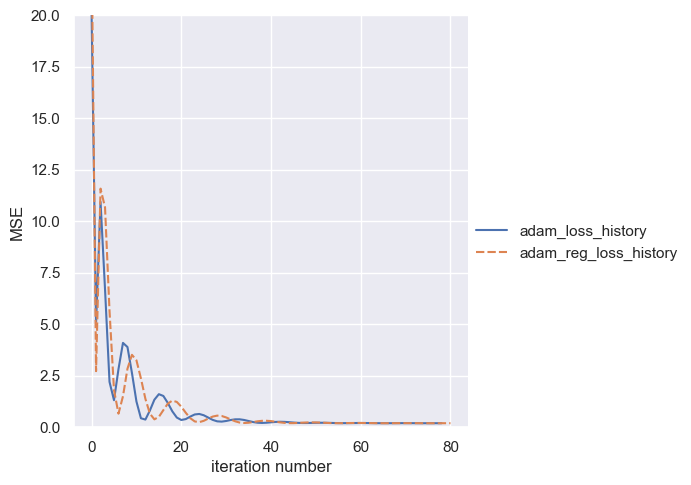

In [214]:
# Adam

g = sns.relplot(
    {
        "adam_loss_history": adam_loss_history,
        "adam_reg_loss_history": adam_reg_loss_history,
    },
    kind="line",
)

g.set(ylim=(0, 20), xlabel="iteration number", ylabel="MSE")

plt.show()

__Vanilla__: без регуляризации - test_loss: 0.22296, R2: 0.82050, train_loss: 0.22416. С регуляризацией - test_loss: 0.24232, R2: 0.80491, train_loss: 0.23956. По графикам видно, что регуляризация сильно уменьшила количество шагов до сходимости, уменьшила mse в пике. Обе ошибки (и на трейне, и на тесте) немного выросли, R2 немного упал. Видимо, в нашем случае модель не сильно прибавила в качестве (она все-таки прибавила в качестве, т.к. я включил в возможные коэффициенты регуляризации "0"), если результат стал даже немного хуже, чем у нас до этого получалось (видимо, нам выпала не такая удачная начальная инициализация).

__Stochastic__: без регуляризации - test_loss: 0.41751, R2: 0.66388, train_loss: 0.42428. С регуляризацией - test_loss: 0.46560, R2: 0.62516, train_loss: 0.40844. По графикам видим, что число шагов увеличилось, но качество модели выросло. Ошибки немного выросли, R2 немного упал. Видимо, ситуация аналогична предыдущему пункту.

__Momentum__: без регуляризации - test_loss: 0.36669, R2: 0.70480, train_loss: 0.23464. С регуляризацией - test_loss: 0.20674, R2: 0.83356, train_loss: 0.20720. Из графиков видим, что очень сильно выросло число шагов до сходимости (даже дошли до ограничения), но модель улучшилась - ошибки значительно сократились, R2 вырос. Видимо, регуляризация значительно помогла.

__Adam__: без регуляризации - test_loss: 0.19726, R2: 0.84119, train_loss: 0.19895. С регуляризацией - test_loss: 0.19776, R2: 0.84079, train_loss: 0.19939. Графики с регуляризацией очень похожи на аналогичные без неё. Ошибки немного выросли, R2 немного упал. Видимо, тут ситуация похожа на аналогичную с vanilla gradient descend. Модель прибавила в качестве, но не сильно. 

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
    \nabla_{w} L(y, X, w) = \tanh(y - X w) \cdot (-X),
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [215]:
lambdas = np.logspace(-6, 2, 9)

In [216]:
from descents import LossFunction

# Vanilla

dimension = X_train.shape[1]
descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': dimension,
        'loss_function': LossFunction.LogCosh
    }
}

best_logcosh_vanilla_l, best_vanilla_loss, best_vanilla_iter_num = find_best_lambdas_descend(descent_config, X_train, y_train.to_numpy(), X_val, y_val.to_numpy(), lambdas)
        
print(f"l: {best_logcosh_vanilla_l}")
print(f"loss: {best_vanilla_loss}")
print(f"iter_num: {best_vanilla_iter_num}")

l: 1e-05
loss: 0.10988619982144476
iter_num: 52


In [217]:
# Vanilla test
dimension = X_train.shape[1]
descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': dimension,
        'lambda_': best_logcosh_vanilla_l,
        'loss_function': LossFunction.LogCosh
    }
}

vanilla_test_loss, vanilla_R2, vanilla_logcosh_loss_history = test_descend(descent_config, X_train, y_train.to_numpy(), X_test, y_test.to_numpy())
print(f"test_loss: {vanilla_test_loss}")
print(f"R2: {vanilla_R2}")

test_loss: 0.10471788907727472
R2: 0.799632938770402


In [218]:
# Stochastic

dimension = X_train.shape[1]
descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'loss_function': LossFunction.LogCosh
    }
}

best_logcosh_stochastic_l, best_stochastic_loss, best_stochastic_iter_num = find_best_lambdas_descend(descent_config, X_train, y_train.to_numpy(), X_val, y_val.to_numpy(), lambdas)

print(f"l: {best_logcosh_stochastic_l}")
print(f"loss: {best_stochastic_loss}")
print(f"iter_num: {best_stochastic_iter_num}")

l: 0.1
loss: 0.0958582151930301
iter_num: 301


In [219]:
# Stochastic test

dimension = X_train.shape[1]
descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'lambda_': best_logcosh_stochastic_l,
        'loss_function': LossFunction.LogCosh
    }
}

stochastic_test_loss, stochastic_R2, stochastic_logcosh_loss_history = test_descend(descent_config, X_train, y_train.to_numpy(), X_test, y_test.to_numpy())
print(f"test_loss: {stochastic_test_loss}")
print(f"R2: {stochastic_R2}")


test_loss: 0.08896491667690302
R2: 0.8308190371439488


In [220]:
# Momentum

dimension = X_train.shape[1]
descent_config = {
    'descent_name': 'momentum',
    'kwargs': {
        'dimension': dimension,
        'loss_function': LossFunction.LogCosh
    }
}

best_momentum_logcosh_l, best_momentum_loss, best_momentum_iter_num = find_best_lambdas_descend(descent_config, X_train, y_train.to_numpy(), X_val, y_val.to_numpy(), lambdas)

print(f"l: {best_momentum_logcosh_l}")
print(f"loss: {best_momentum_loss}")
print(f"iter_num: {best_momentum_iter_num}")

l: 1e-05
loss: 0.0864466086912495
iter_num: 99


In [221]:
# Momentum test
dimension = X_train.shape[1]
descent_config = {
    "descent_name": "momentum",
    "kwargs": {"dimension": dimension, "lambda_": best_momentum_logcosh_l, 'loss_function': LossFunction.LogCosh},
}

momentum_test_loss, momentum_R2, momentum_logcosh_loss_history = test_descend(
    descent_config, X_train, y_train.to_numpy(), X_test, y_test.to_numpy()
)
print(f"test_loss: {momentum_test_loss}")
print(f"R2: {momentum_R2}")

test_loss: 0.08614721530375126
R2: 0.8370958626041293


In [222]:
# Adam

dimension = X_train.shape[1]
descent_config = {
    "descent_name": "adam",
    "kwargs": {
        "dimension": dimension,
        "loss_function": LossFunction.LogCosh,
    },
}

best_adam_logcosh_l, best_adam_loss, best_adam_iter_num = find_best_lambdas_descend(
    descent_config, X_train, y_train.to_numpy(), X_val, y_val.to_numpy(), lambdas
)

print(f"l: {best_adam_logcosh_l}")
print(f"loss: {best_adam_loss}")
print(f"iter_num: {best_adam_iter_num}")

l: 10.0
loss: 0.0846607681661973
iter_num: 138


In [223]:
# Adam test
dimension = X_train.shape[1]
descent_config = {
    "descent_name": "adam",
    "kwargs": {"dimension": dimension, "lambda_": best_adam_logcosh_l, "loss_function": LossFunction.LogCosh},
}

adam_test_loss, adam_R2, adam_logcosh_loss_history = test_descend(
    descent_config, X_train, y_train.to_numpy(), X_test, y_test.to_numpy()
)
print(f"test_loss: {adam_test_loss}")
print(f"R2: {adam_R2}")

test_loss: 0.08334926936644844
R2: 0.8417882760127932


c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


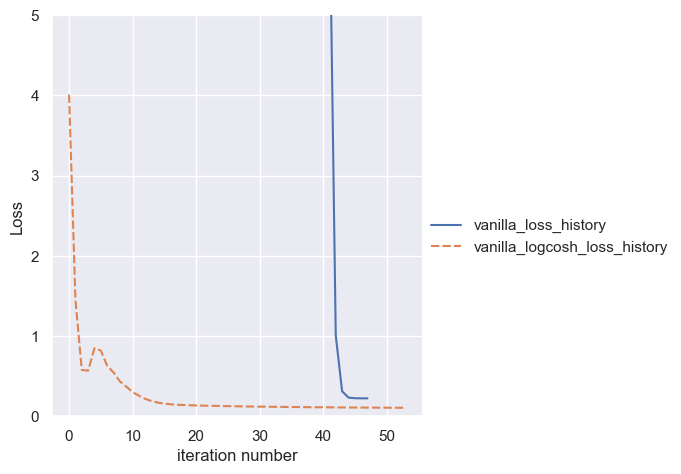

In [224]:
# теперь сравниваем графики

# Vanilla

g = sns.relplot(
    {
        "vanilla_loss_history": vanilla_loss_history,
        "vanilla_logcosh_loss_history": vanilla_logcosh_loss_history,
    },
    kind="line",
)

g.set(ylim=(0, 5), xlabel="iteration number", ylabel="Loss")

plt.show()

c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


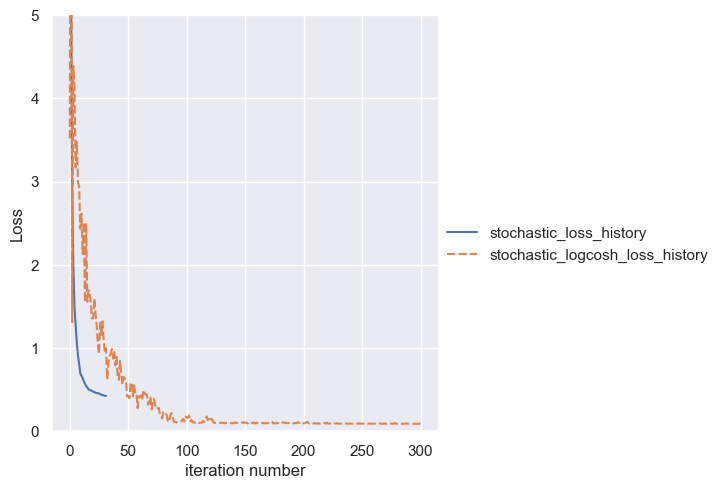

In [225]:
# Stochastic

g = sns.relplot(
    {
        "stochastic_loss_history": stochastic_loss_history,
        "stochastic_logcosh_loss_history": stochastic_logcosh_loss_history,
    },
    kind="line",
)

g.set(ylim=(0, 5), xlabel="iteration number", ylabel="Loss")

plt.show()

c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


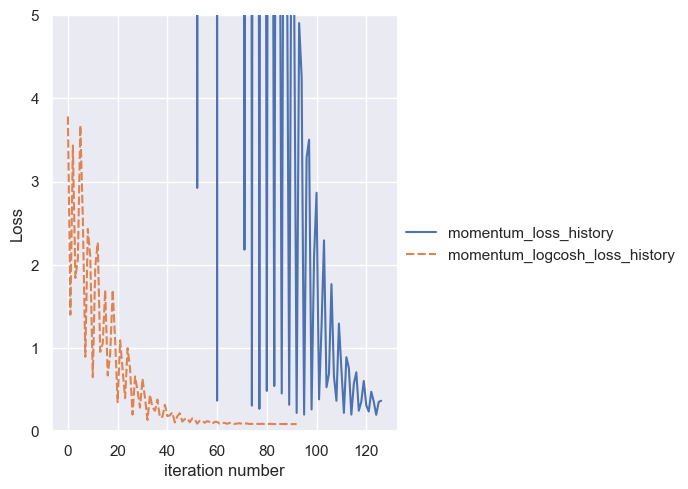

In [226]:
# Momentum

g = sns.relplot(
    {
        "momentum_loss_history": momentum_loss_history,
        "momentum_logcosh_loss_history": momentum_logcosh_loss_history,
    },
    kind="line",
)

g.set(ylim=(0, 5), xlabel="iteration number", ylabel="Loss")

plt.show()

c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


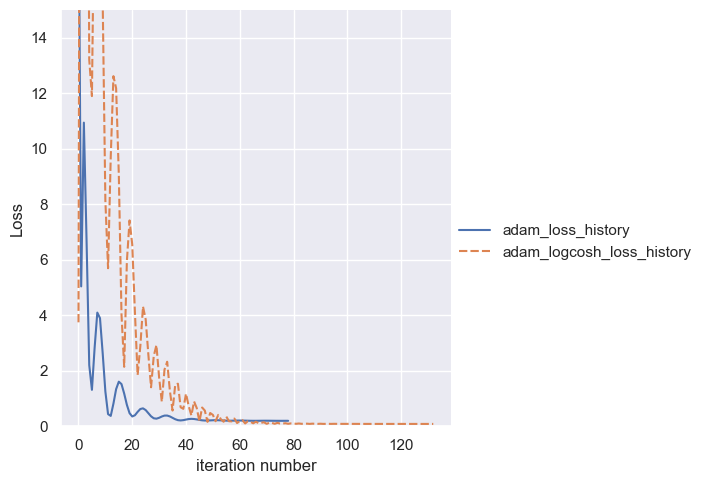

In [227]:
# Adam

g = sns.relplot(
    {
        "adam_loss_history": adam_loss_history,
        "adam_logcosh_loss_history": adam_logcosh_loss_history,
    },
    kind="line",
)

g.set(ylim=(0, 15), xlabel="iteration number", ylabel="Loss")

plt.show()

__Vanilla__: MSE - R2: 0.82050. LogCosh -  R2: 0.79963. По графикам видно, что LogCosh сильно уменьшила количество итераций, а также график теперь похож на нормальный (нет горба). Качество чуть ухудшилось, но это может быть проблемой неудачной инициализации.

__Stochastic__: MSE - R2: 0.66388. LogCosh - R2: 0.83081. По графикам видим, что число шагов увеличилось, и даже дошло до предела в 300 шагов, но R2 значительно вырос, даже обогнал ванильный градиентный спуск (что немного странно).

__Momentum__: MSE - R2: 0.70480. LogCosh - R2: 0.83709. Из графиков видим, что число шагов увеличилось, но модель улучшилась - R2 вырос.

__Adam__: MSE - R2: 0.84119. LogCosh - R2: 0.84178. Количество итераций выросло заметно, а вот качество - не очень.

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [237]:
# AdaMax MSE

dimension = X_train.shape[1]
descent_config = {
    'descent_name': 'adamax',
    'kwargs': {
        'dimension': dimension,
    }
}

best_mse_adamax_l, best_mse_adamax_loss, best_mse_adamax_iter_num = find_best_lambdas_descend(descent_config, X_train, y_train.to_numpy(), X_val, y_val.to_numpy(), lambdas)
        
print(f"l: {best_mse_adamax_l}")
print(f"loss: {best_mse_adamax_loss}")
print(f"iter_num: {best_mse_adamax_iter_num}")

l: 1.0
loss: 0.20063304417253092
iter_num: 65


In [238]:
# AdaMax MSE test
dimension = X_train.shape[1]
descent_config = {
    "descent_name": "adamax",
    "kwargs": {"dimension": dimension, "lambda_": best_mse_adamax_l},
}

adamax_mse_test_loss, adamax_mse_R2, adamax_mse_loss_history = test_descend(
    descent_config, X_train, y_train.to_numpy(), X_test, y_test.to_numpy()
)
print(f"test_loss: {adamax_mse_test_loss}")
print(f"R2: {adamax_mse_R2}")

test_loss: 0.2041493168552439
R2: 0.8356499019981003


In [247]:
# AdaMax LogCosh

from descents import LossFunction 

dimension = X_train.shape[1]
descent_config = {
    'descent_name': 'adamax',
    'kwargs': {
        'dimension': dimension,
        'loss_function': LossFunction.LogCosh,
    }
}

best_logcosh_adamax_l, best_logcosh_adamax_loss, best_logcosh_adamax_iter_num = find_best_lambdas_descend(descent_config, X_train, y_train.to_numpy(), X_val, y_val.to_numpy(), lambdas)
        
print(f"l: {best_logcosh_adamax_l}")
print(f"loss: {best_logcosh_adamax_loss}")
print(f"iter_num: {best_logcosh_adamax_iter_num}")

l: 10.0
loss: 0.0846569330641947
iter_num: 131


In [248]:
# AdaMax LogCosh test
dimension = X_train.shape[1]
descent_config = {
    "descent_name": "adamax",
    "kwargs": {"dimension": dimension, "lambda_": best_mse_adamax_l, 'loss_function': LossFunction.LogCosh},
}

adamax_logcosh_test_loss, adamax_logcosh_R2, adamax_logcosh_loss_history = test_descend(
    descent_config, X_train, y_train.to_numpy(), X_test, y_test.to_numpy()
)
print(f"test_loss: {adamax_logcosh_test_loss}")
print(f"R2: {adamax_logcosh_R2}")

test_loss: 0.08349331533031237
R2: 0.841891781590988


c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


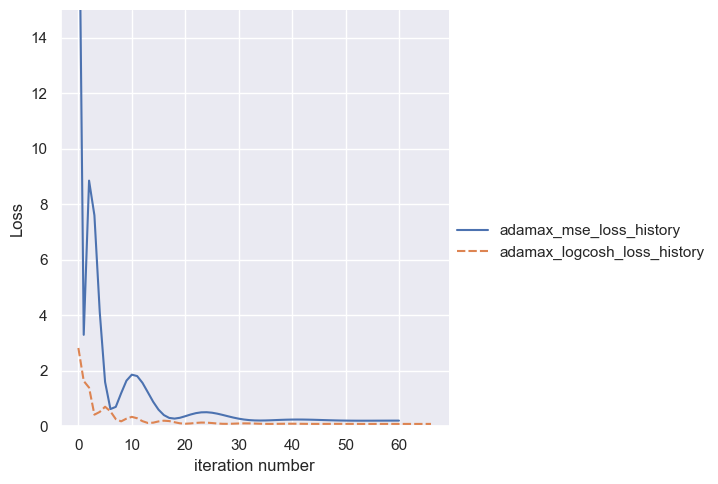

In [249]:
g = sns.relplot(
    {
        "adamax_mse_loss_history": adamax_mse_loss_history,
        "adamax_logcosh_loss_history": adamax_logcosh_loss_history,
    },
    kind="line",
)

g.set(ylim=(0, 15), xlabel="iteration number", ylabel="Loss")

plt.show()

Видим, что AdaMax работает довольно хорошо. Кол-во итераций не очень большое, R2 при функции потерь LogCosh почти равен R2 обычного Adam, даже чуть лучше. Сходится к хорошему показателю лосса тоже довольно быстро - MSE к 33 итерации, а LogCosh уже к 20.

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: